In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.integrate import simps

data1536 = pd.read_csv('20181004-1536welltest.txt',
                  skiprows =[0,1,2,3,4,5])

wells = data1536.loc[:,'Unnamed: 0':'Unnamed: 1']
layout = pd.read_csv('20181015-1536PlateLayout3.csv')

wells['Unnamed: 0'] = wells['Unnamed: 0'].str.replace(r'[a]', 'AA')
wells['Unnamed: 0'] = wells['Unnamed: 0'].str.replace(r'[b]', 'AB')
wells['Unnamed: 0'] = wells['Unnamed: 0'].str.replace(r'[c]', 'AC')
wells['Unnamed: 0'] = wells['Unnamed: 0'].str.replace(r'[d]', 'AD')
wells['Unnamed: 0'] = wells['Unnamed: 0'].str.replace(r'[e]', 'AE')
wells['Unnamed: 0'] = wells['Unnamed: 0'].str.replace(r'[f]', 'AF')
wells['Unnamed: 0'] = wells['Unnamed: 0'].str.lower()
wells = wells['Unnamed: 0'].str.cat(wells['Unnamed: 1'].astype(str))

### The well names came off the platereader weird so this corrects them



data1536 = data1536.loc[:,'Unnamed: 2':].drop('Unnamed: 584', 
                              axis = 1)
name = pd.read_csv('20181004-1536welltest.txt',
                  nrows =3)['User: USER'][1]


data1536 = data1536.where(data1536['Unnamed: 2'] != 'unused ').dropna()
data1536 = data1536.rename(data1536['Unnamed: 2']).drop(['Unnamed: 2'],
                                    axis = 1)

data1536 = data1536.subtract(data1536['800'],
             axis = 0)
data1536.columns = data1536.columns.astype(int)
data1536.index= wells
data1536 = data1536.loc[:,300:]

data1536 = data1536.loc[layout[layout['[Prot]/µM'] != 0]['0']] ### eliminate empty wells
layout = layout[layout['[Prot]/µM'] != 0]
layout.index = layout['0']
layout = layout.loc[data1536.index].dropna().drop('0', axis = 1)
print(np.shape(data1536))
print(np.shape(layout))

(576, 501)
(576, 9)


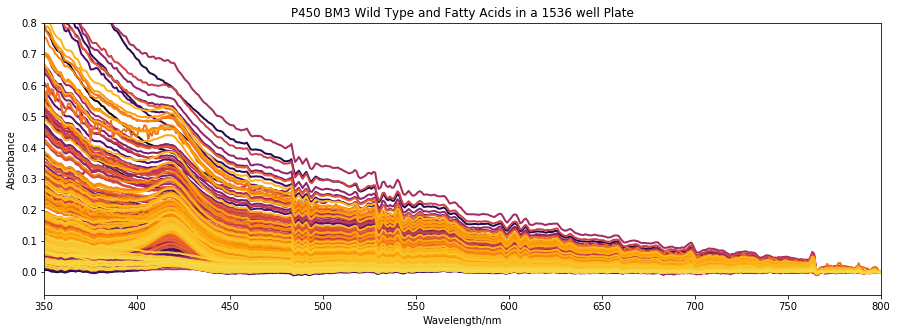

In [2]:
trimmed = data1536.loc[:,'350':'800']



fig, ax = plt.subplots(figsize=(15,5))
ax.set_prop_cycle('color',plt.cm.inferno(np.linspace(0,0.9,len(trimmed))))

for i in range(0,len(trimmed)):
    plt.plot(trimmed.iloc[i,:],
                lw = 2)

plt.title('P450 BM3 Wild Type and Fatty Acids in a 1536 well Plate')    
plt.xticks(np.linspace(350,800,10))
plt.ylabel('Absorbance')
plt.xlabel('Wavelength/nm')
plt.axis(xmin = 350, xmax = 800, ymax = 0.8)

plt.show()

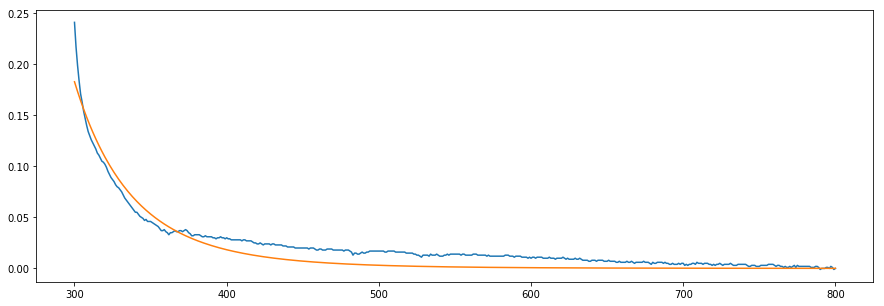

0.898663499474289
[-1.46129126e+05  1.58293126e+01  1.43816253e+03]


In [5]:
def anomalycurve1(x,k1,k2):
    y = k1*np.exp(x/k2)
    return y
def anomalycurve2(x,k1,k2):  ### 1,65,k1,k2
    y = ((1/k1)**x)*k2
    return y
def anomalycurve3(x,k1,k2): ### 65,81,k1,k2
    y = k1*np.exp(-x*(1/k2))
    return y

def anomalycurve4(x,k1,k2): ### 4.6, 5e+11 ### best fit so far
    y = (1/x**k1)*k2*1e+10
    return y
def anomalycurve5(x,k1): ### 4.6, 5e+11 ### best fit so far
    y = (1/x**4)*k1
    return y
def scattercurve1(x,a,b):
    y = 1/((1-a)*x) + b ### lambda is wavelength (x)
    return y
def scattercurve2(x, na,R,k):  ### fixing theta to 0 and I0 to 1
    y = ((8*(np.pi**4)*na**2)/(x**4)*R**2 )* (1+np.cos(0)**2) * (k/x**4)
    return y


def fitanomalycurve(func,x,y):
    params = optimize.curve_fit(func, x,y, p0=[1], maxfev =1000)
    return params
def fitscattercurve(func,x,y):
    params = optimize.curve_fit(func, x,y, p0=[-1e+5,10,1e+3], maxfev =10000000)
    return params


y = data1536.iloc[350,:]

x = y.index.values

curve = scattercurve2

coefs = fitscattercurve(curve,x,y)
na,R,k= [i for i in coefs[0]]

# R^2
residuals = y - curve(x,na,R,k)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)


plt.figure(figsize = (15,5))
plt.plot(x,y)
plt.plot(x,curve(x,na,R,k))

plt.show()
print(r_squared)
print(coefs[0])

In [6]:
def scattercurve3(x, n, R, d):  ### fixing theta to 0 and I0 to 1
    y = (2*np.pi / x)**4 * ((n**2 - 1)/(n**2 + 2))**2 * (1+np.cos(0)**2)/(2*R**2) *(d/2)**6 #(k/x**4)
    return y
def fitscattercurve3(x,y):
    params = optimize.curve_fit(scattercurve3, x,y, p0=[-1e+5,-1e+1,1], maxfev =100000)
    return params


In [88]:
#len(x)
y

300    0.255
301    0.230
302    0.212
303    0.196
304    0.183
305    0.173
306    0.164
307    0.156
308    0.149
309    0.142
310    0.138
311    0.134
312    0.131
313    0.127
314    0.123
315    0.120
316    0.117
317    0.114
318    0.110
319    0.108
320    0.106
321    0.104
322    0.100
323    0.095
324    0.092
325    0.090
326    0.087
327    0.085
328    0.083
329    0.082
       ...  
371    0.035
372    0.034
373    0.035
374    0.035
375    0.034
376    0.032
377    0.031
378    0.030
379    0.031
380    0.032
381    0.031
382    0.031
383    0.031
384    0.030
385    0.030
386    0.031
387    0.030
388    0.031
389    0.031
390    0.031
391    0.030
392    0.030
393    0.030
394    0.031
395    0.031
396    0.032
397    0.033
398    0.033
399    0.033
400    0.033
Name: r2, Length: 101, dtype: float64

In [131]:
def scattercurve4(x, n):  ### k = 1940177802.9471817 (averaged)

    y = (1/ x)**4 * ((n**2 - 1)/(n**2 + 2))**2 * 1940177802.9471817

    return y
def fitscattercurve4(x,y):
    params = optimize.curve_fit(scattercurve4, x,y, p0=[100], maxfev =10000000)
    return params


'''
coefs = fitscattercurve4(x,y)[0]
n,k,p = [i for i in coefs]
 # R^2
residuals = y - scattercurve4(x,n,k,p)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print('r_squared = ',r_squared)
print('n = ',n)
print('k = ',k)
print('p = ',p)



plt.figure(figsize = (15,5))
plt.plot(x,y, alpha = 1, lw = 2)
plt.plot(x,scattercurve4(x, n, k,p), alpha = 1, lw = 2)
plt.show()'''

rayleigh = pd.DataFrame()
for i in range(0,50):
    y = data1536.iloc[i,:]
    x = y.index.values
    
    coefs = fitscattercurve4(x,y)[0]
    n= [i for i in coefs]
    n = n[0]

    # R^2
    residuals = y - scattercurve4(x,n)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    rayleigh = rayleigh.append(pd.Series([r_squared, n], name = y.name))
rayleigh. columns =['r_squared', 'n']
#rayleigh = rayleigh.loc[rayleigh['r_squared']>0]
rayleigh

C:\Users\MFBX3JE3\Anaconda35\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


,r_squared,n
a1,-0.150800,20099.999924
b1,0.865757,-3.059745
c1,0.768589,-2.532196
d1,0.854070,-3.640954
e1,0.739675,-2.892934
f1,0.744400,-3.095556
g1,0.595545,-2.270272
h1,0.882162,-4.563174
i1,0.582000,40099.999123
j1,0.371985,25099.999737


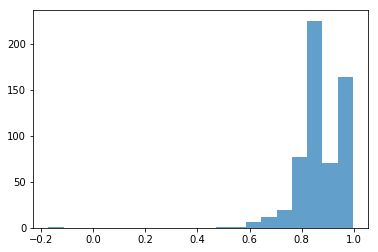

In [19]:
def scattercurve5(x, n):  ### k = 1940177802.9471817 (averaged)

    y = (1/ x)**4 * n

    return y
def fitscattercurve5(x,y):
    params = optimize.curve_fit(scattercurve5, x,y, p0=[100], maxfev =10000000)
    return params
ndata = pd.DataFrame()
for i in range(0, len(data1536)):
    y = data1536.iloc[i,:]
    x = y.index.values
    
    coefs = fitscattercurve5(x,y)[0]
    n= [i for i in coefs]
    n = n[0]

    # R^2
    residuals = y - scattercurve5(x,n)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    ndata = ndata.append(pd.Series([r_squared, n], name = y.name))
ndata. columns =['r_squared', 'n']
plt.hist(ndata['r_squared'], bins = 20, alpha = 0.7)
plt.show()

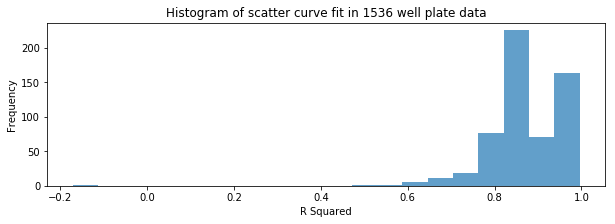

In [25]:
plt.figure(figsize = (10,3))
plt.hist(ndata['r_squared'], bins = 20, alpha = 0.7)
plt.xlabel('R Squared')
plt.ylabel('Frequency')
plt.title('Histogram of scatter curve fit in 1536 well plate data')
plt.show()

In [27]:
from scipy import optimize

def curve(x, m,c):
    y = m*x + c
    return y
x = layout['Substrate/nl']#*layout['[Prot]/µM']
y = ndata['n']

params, cov = optimize.curve_fit(curve, x,y, p0=[1,1])
x2 = np.linspace(0,x.max(), 10)
y2 = curve(x2, params[0], params[1])

 # R^2
residuals = y - curve(x,n)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
    
print(r_squared)    
plt.figure(figsize = (15,5))
plt.scatter(x,y,
           marker = '+', c = -ndata['r_squared'])
plt.plot(x2, y2,color = '0.1')

plt.show

TypeError: curve() missing 1 required positional argument: 'c'

In [99]:
rayleigh = pd.DataFrame()
for i in range(0,50):
    curve = scattercurve2
    y = data1536.iloc[i,:]
    x = y.index.values
    
    coefs = fitscattercurve(curve,x,y)
    n,R,k= [i for i in coefs[0]]

    # R^2
    residuals = y - curve(x,na,R,k)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    rayleigh = rayleigh.append(pd.Series([r_squared, n,R,k], name = y.name))
rayleigh. columns =['r_squared', 'n','R','k']
rayleigh = rayleigh.loc[rayleigh['r_squared']>0]
rayleigh

,r_squared,n,R,k
a1,0.446267,-215787.926208,20.449861,4833.271649
b1,0.929415,-145597.802811,12.363208,2514.829150
c1,0.869613,-165724.966972,13.343162,1334.551383
d1,0.790312,-182996.817802,15.988198,1153.251312
e1,0.815296,-126821.337560,14.885479,2282.349165
f1,0.936298,-143394.546431,12.859067,2583.023480
g1,0.734850,-126563.931545,13.697256,1895.426679
h1,0.825494,-173359.239576,10.882784,3174.187866
i1,0.810898,-172367.359032,19.039876,2733.059216
j1,0.622814,-191017.259931,20.265581,2493.411267


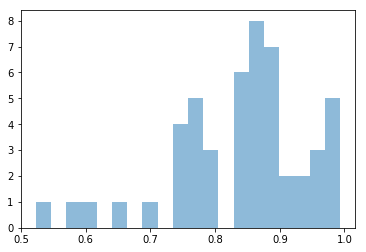

In [127]:
plt.hist(rayleigh['r_squared'], bins = 20, alpha = 0.5)
#plt.xticks(np.linspace(0.5,1,6))

#plt.axis(xmin = 0.5, xmax = 1, ymax = 25)

plt.show()

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [300] of <class 'int'>

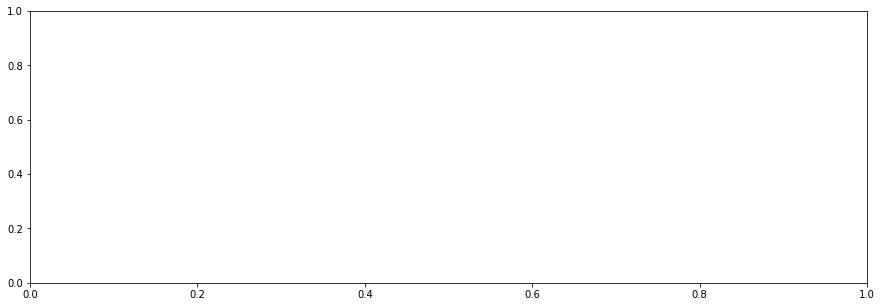

In [96]:
fig, ax = plt.subplots(figsize=(15,5))
#ax.set_prop_cycle('color',plt.cm.inferno(np.linspace(0,0.9,step)))

for i in data1536:
    y = data1536.loc[i,:]
    x = y.index.values

    
    plt.plot(x,y, alpha = 1, lw = 2, c = str(area[i]))
plt.axis(xmin = 300, xmax = 800, ymax = 0.5)

plt.show()

In [17]:
rayleigh.columns

Index(['r_squared', 'n', 'R', 'k'], dtype='object')

<Figure size 1080x360 with 0 Axes>

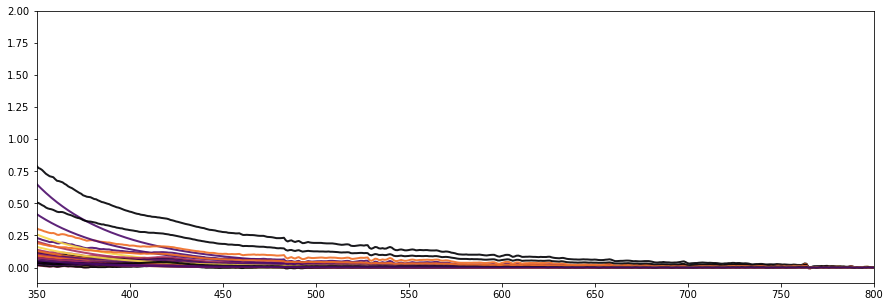

In [24]:
plt.figure(figsize = (15,5))
step = 5
start = 900
fig, ax = plt.subplots(figsize=(15,5))
ax.set_prop_cycle('color',plt.cm.inferno(np.linspace(0,0.9,step)))

for i in rayleigh.index:
    y = data1536.loc[i,:]
    x = y.index.values

    
    plt.plot(x,y, alpha = 0.9, lw = 2)
    
    y2 = scattercurve2(x,
                       rayleigh['n'][i],
                      rayleigh['R'][i],
                      rayleigh['k'][i])
    plt.plot(x,y2, alpha = 0.9, lw = 2)
plt.axis(xmin = 350, xmax = 800, ymax = 2)

plt.show()

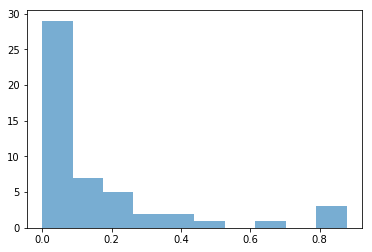

In [955]:
def straightline(x, m,c): 
    y = m*x + c
    return y
def fitline(func,x,y):
    params = optimize.curve_fit(func, x,y, p0=[1,1], maxfev =1000)
    return params
lines = pd.DataFrame()
for i in range(0,50):
    y = data1536.iloc[i]
    y = y.loc[700:800]
    x = y.index.values
    
    coefs = fitline(straightline,x,y)
    m,c= [i for i in coefs[0]]

    # R^2
    residuals = y - straightline(x,m,c)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    lines = lines.append(pd.Series([r_squared, m,c], name = y.name))
lines. columns =['r_squared',  'm','c']
plt.hist(lines['r_squared'], alpha = 0.6)
plt.show()

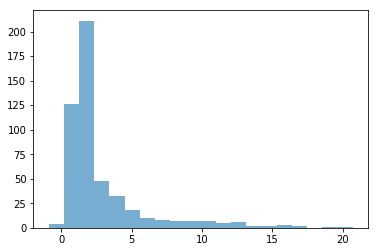

In [970]:
simps(y, dx = 5)
areas = pd.Series()
for i in range(0,500):
    y = data1536.iloc[i]
    y = y.loc[700:800]
    x = y.index.values
    

    areas = areas.append(pd.Series(simps(y, dx = 5), name = data1536.iloc[i].name))

plt.hist(areas, alpha = 0.6, bins = 20)
plt.show()